**Shubham Gopal Raul**  
*CB.EN.P2AEL23023*<br>

## <center>CAR PRICE PREDICTION</center>

In [4]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from mlxtend.plotting import plot_learning_curves
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('..\Data\Car_Data.csv',)
data.dropna(inplace=True)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage kmpl,engine CC,max_power bhp,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,5.0


In [6]:
print(data.shape)
data.isna().sum()

(7903, 13)


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage kmpl     0
engine CC        0
max_power bhp    0
torque           0
seats            0
dtype: int64

In [7]:
data.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage kmpl     float64
engine CC        float64
max_power bhp    float64
torque           float64
seats            float64
dtype: object

In [8]:
data.describe()

,year,selling_price,km_driven,mileage kmpl,engine CC,max_power bhp,torque,seats
count,7903.000000,7.903000e+03,7.903000e+03,7903.000000,7903.000000,7903.000000,7903.000000,7903.000000
mean,2013.984183,6.499617e+05,6.919632e+04,19.421665,1458.909528,91.601895,168.342564,5.416551
std,3.864069,8.137001e+05,5.680010e+04,4.035925,503.869834,35.742658,97.295423,0.959356
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,4.800000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,101.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,155.000000,5.000000
75%,2017.000000,6.900000e+05,9.575000e+04,22.320000,1582.000000,102.000000,202.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,789.000000,14.000000


In [9]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage kmpl', 'engine CC', 'max_power bhp',
       'torque', 'seats'],
      dtype='object')

### Car Data Visualization
<br></br>

Text(0.5, 1.0, 'Correlation Matrix')

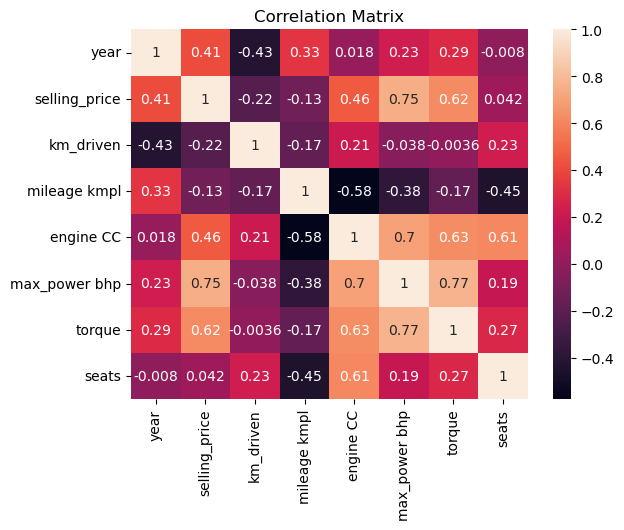

In [10]:
sns.heatmap(data.corr(),annot=True,).set_title('Correlation Matrix')

Text(0.5, 0, 'Selling_Price Correlation')

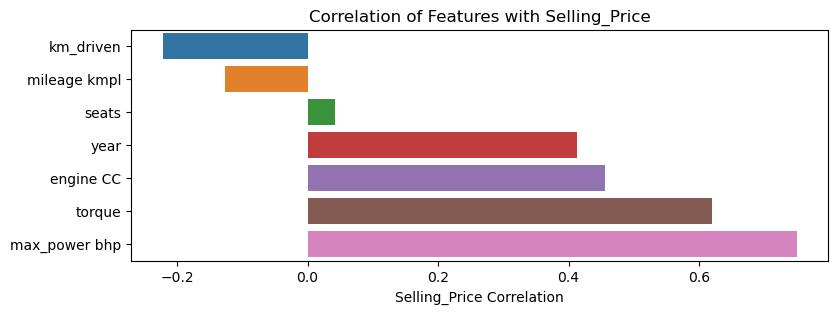

In [11]:
fig = plt.figure(figsize=(9,3))
df_corr = pd.DataFrame(data.corr())['selling_price'].drop('selling_price').sort_values()
sns.barplot(x=df_corr.values,y=df_corr.index,orient='h').set_title('Correlation of Features with Selling_Price')
plt.xlabel('Selling_Price Correlation')

Text(0.5, 1.0, 'Selling_Price VS Year')

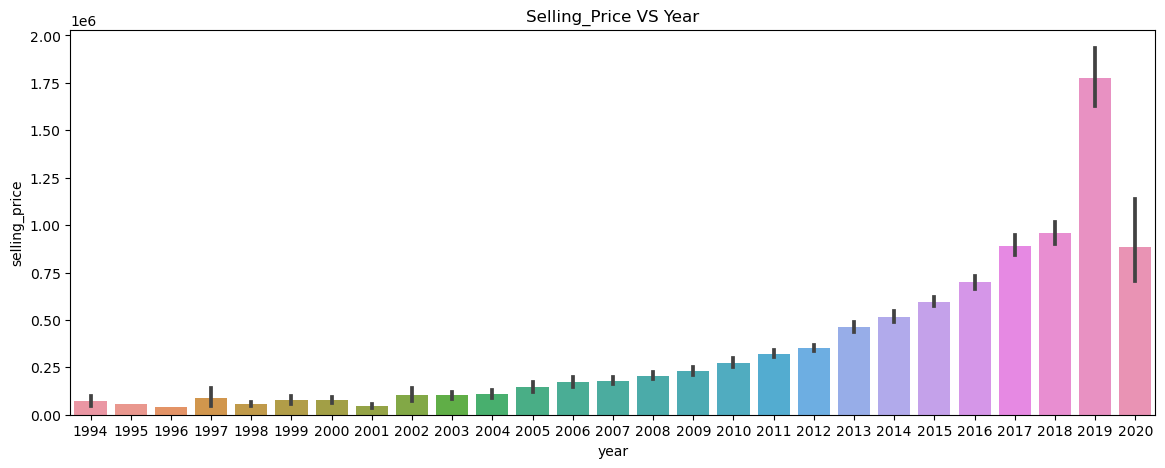

In [12]:
fig1 = plt.figure(figsize=(14,5))
sns.barplot(data,x='year',y='selling_price').set_title('Selling_Price VS Year')

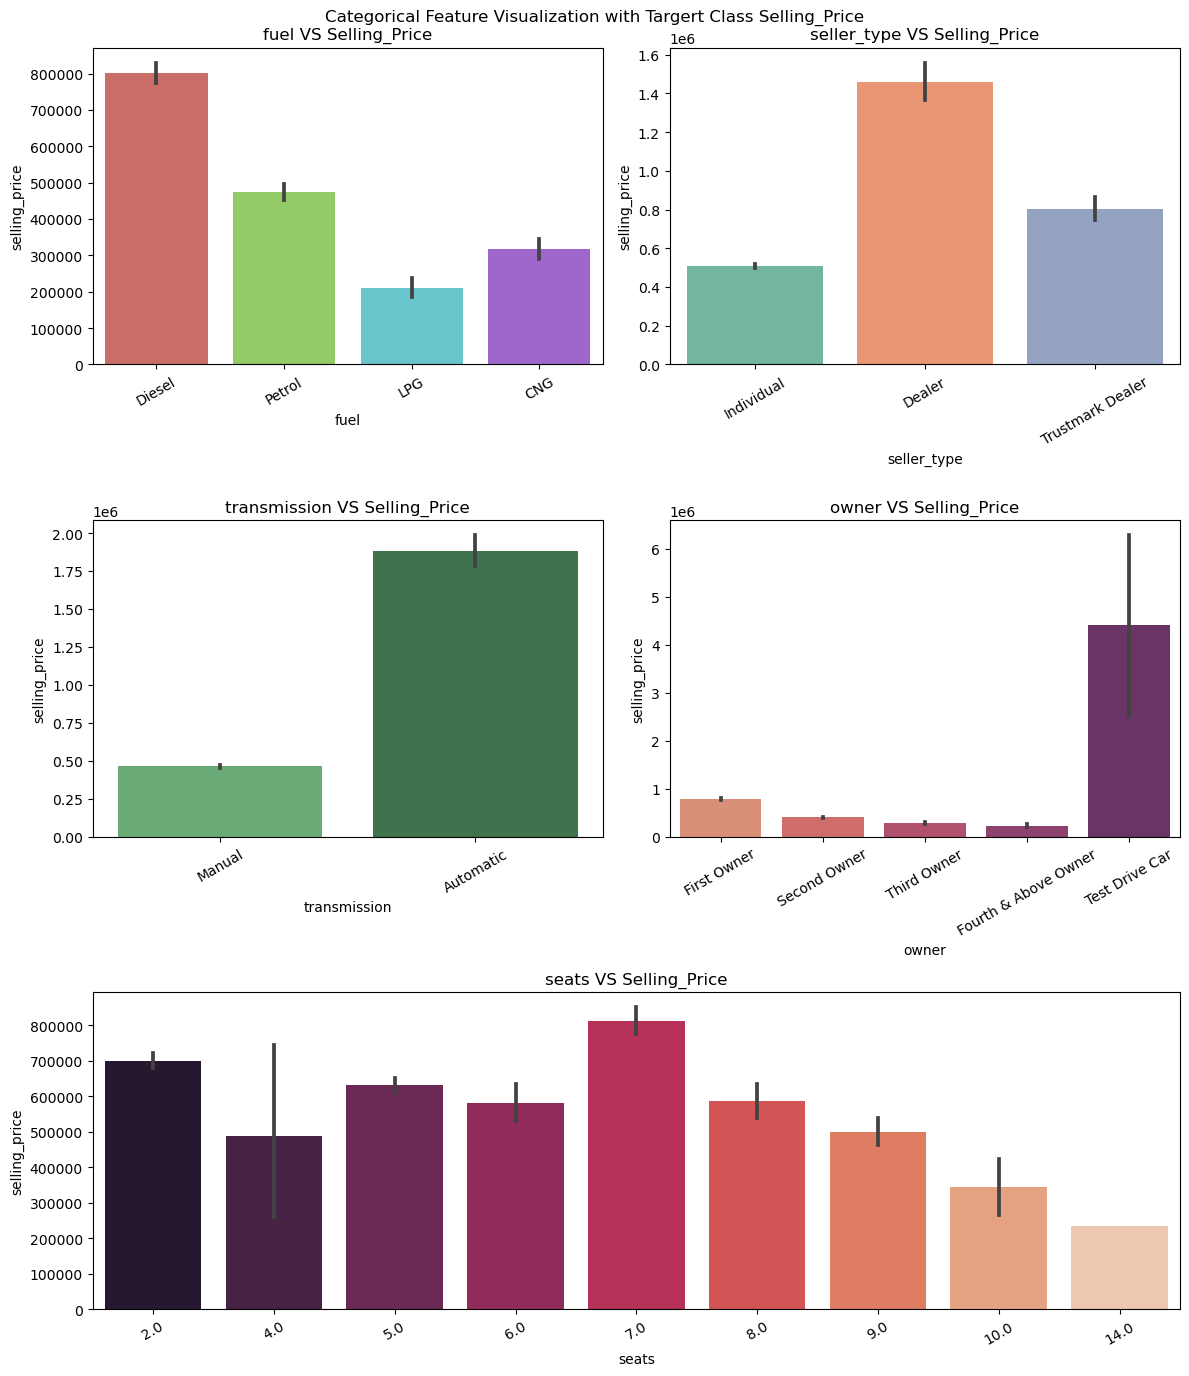

In [13]:
fig2 = plt.figure(figsize=(12,14))
fig2.suptitle('Categorical Feature Visualization with Targert Class Selling_Price')
Pal = [None,'hls','Set2','Greens_d','flare','rocket']
for i in range(1,6):
    if(i==5):
        ax2 = fig2.add_subplot(3,2,(5,6))
        sns.barplot(data,x=data.columns[-1],y='selling_price',palette=Pal[i]).set_title(data.columns[-1]+' VS Selling_Price')
    else:
        ax2 = fig2.add_subplot(3,2,i)
        sns.barplot(data,x=data.columns[3+i],y='selling_price',palette=Pal[i]).set_title(data.columns[3+i]+' VS Selling_Price')
    ax2.tick_params(axis='x', rotation=30)
    plt.tight_layout()

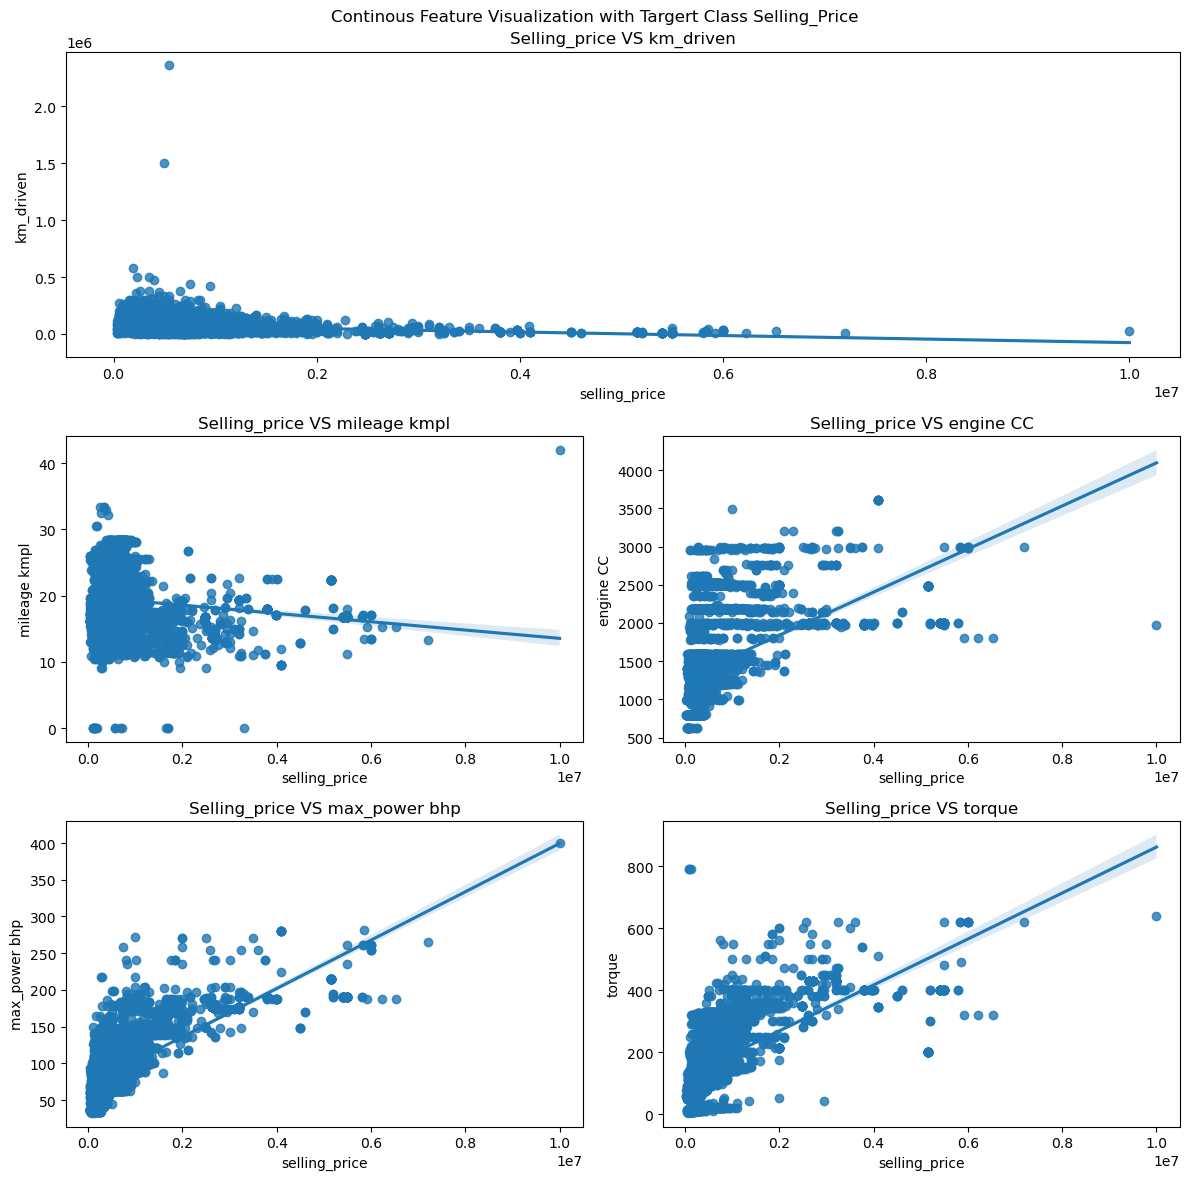

In [14]:
fig3 = plt.figure(figsize=(12,12))
fig3.suptitle('Continous Feature Visualization with Targert Class Selling_Price')
for i in range(2,7):
    if(i==2):
        ax3 = fig3.add_subplot(3,2,(1,2))
        sns.regplot(data,x='selling_price',y='km_driven').set_title('Selling_price VS km_driven')
    else:
        ax3 = fig3.add_subplot(3,2,i)
        sns.regplot(data,x='selling_price',y=data.columns[5+i]).set_title('Selling_price VS '+data.columns[5+i])
    plt.tight_layout()

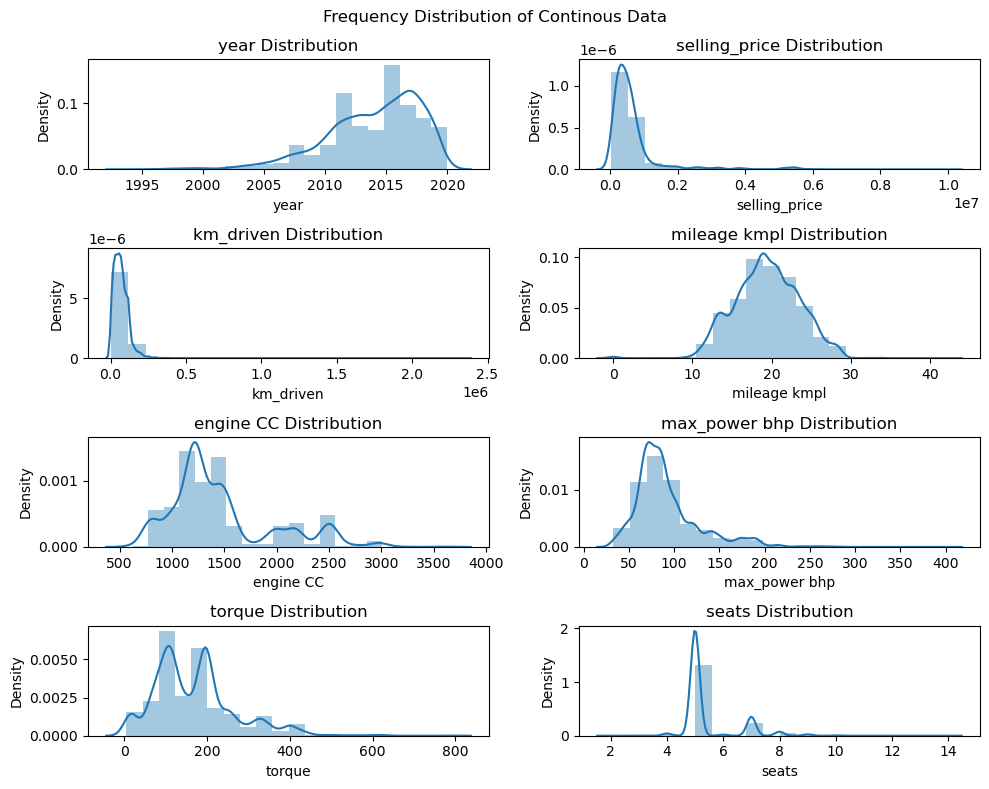

In [15]:
fig4,j = plt.figure(figsize=(10,8)),1
fig4.suptitle('Frequency Distribution of Continous Data')
for i in data.select_dtypes('number').columns:
    ax4 = fig4.add_subplot(4,2,j)
    sns.distplot(data[i],bins=20).set_title(i+' Distribution')
    plt.tight_layout()
    j+=1

In [16]:
'''
fig5 ,k = plt.figure(figsize=(18,20)),0
fig5.suptitle('Dispersion Visualization of Continous Feature with other group data',fontsize=20,y=1.005)
for i in data.select_dtypes('object').columns:
    for j in data.select_dtypes('number').columns:
        k+=1
        ax5 = fig5.add_subplot(8,5,k)
        sns.boxplot(data,y=j,x=i).set_title(j+' VS '+i,fontsize=18)
        plt.tight_layout()
'''

"\nfig5 ,k = plt.figure(figsize=(18,20)),0\nfig5.suptitle('Dispersion Visualization of Continous Feature with other group data',fontsize=20,y=1.005)\nfor i in data.select_dtypes('object').columns:\n    for j in data.select_dtypes('number').columns:\n        k+=1\n        ax5 = fig5.add_subplot(8,5,k)\n        sns.boxplot(data,y=j,x=i).set_title(j+' VS '+i,fontsize=18)\n        plt.tight_layout()\n"

### Encoding

In [17]:
def Car_data_encode(df):
    Encoded_data = pd.DataFrame(data.loc[:,'selling_price'])
    # Ordinal Encoding on Year
    Ordinal_Encoder = preprocessing.OrdinalEncoder(categories=[list(sorted(df['year'].unique()))])
    Encoded_data['year'] = Ordinal_Encoder.fit_transform(df[['year']])
    #Scaling the Kms Countinous feature
    Scaler = preprocessing.StandardScaler()
    for i in ['engine CC', 'max_power bhp', 'torque']:
        Encoded_data[i] = Scaler.fit_transform([df[i]])[0]
    # One Hot Encoding on Categorical Data
    OneHot_Encoder = preprocessing.OneHotEncoder()
    Encoded_data[OneHot_Encoder.get_feature_names_out()] = pd.DataFrame(OneHot_Encoder.fit_transform(data[['fuel', 'seller_type','transmission', 'owner','seats']]).toarray())
    return Encoded_data

In [18]:
data1 = Car_data_encode(data).dropna()
Car_Target = data1[['selling_price']]
Car_Feature = data1.drop('selling_price',axis=1)
Car_Feature.head()

,year,engine CC,max_power bhp,torque,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,...,owner_Third Owner,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(Car_Feature,Car_Target,test_size=0.2,random_state=100)

In [20]:
data = pd.read_csv('..\Data\car data.csv')
def Car_data_encode(df):
    Encoded_data = pd.DataFrame(data.loc[:,'Present_Price'])
    # Ordinal Encoding on Year
    Ordinal_Encoder = preprocessing.OrdinalEncoder(categories=[list(sorted(data['Year'].unique()))])
    Encoded_data['Year'] = Ordinal_Encoder.fit_transform(data[['Year']])
    #Scaling the Kms Countinous feature
    Scaler = preprocessing.Normalizer(norm='l2')
    Encoded_data['Kms_Driven'] = Scaler.fit_transform([data['Kms_Driven']])[0]
    # One Hot Encoding on Categorical Data
    OneHot_Encoder = preprocessing.OneHotEncoder()
    Encoded_data[OneHot_Encoder.get_feature_names_out()] = pd.DataFrame(OneHot_Encoder.fit_transform(data[['Fuel_Type','Seller_Type','Transmission','Owner']]).toarray())
    return Encoded_data
Car_Feature = Car_data_encode(data)
Car_Target = data[['Selling_Price']]
X_train, X_test, Y_train, Y_test = train_test_split(Car_Feature,Car_Target,test_size=0.2,random_state=100)

In [21]:
def performance_report(y_true,y_pred,model):
    report = {
        'Model' : model,
        'R2 Score' : round(r2_score(y_true,y_pred),2),
        'Root Mean Square Error' : round(math.sqrt(mean_squared_error(y_true,y_pred)),2),
        'Mean Absolute Error' : round(mean_absolute_error(y_true,y_pred),2),
        'Mean Absolute Percentage Error' : round(mean_absolute_percentage_error(y_true,y_pred),2)
    }
    return report
    
def accuracy_plot(y_true,y_pred,model):
    Model_Score = pd.DataFrame(y_pred,columns=['Predicted Value'])
    Model_Score['Actual Value'] = list(y_true['Selling_Price'])
    ax1 = sns.lineplot(Model_Score).set_title(model+' Model Accuracy')
    return ax1

def print_perf(df):
    print('-'*75,end='\n')
    for i in df.columns[1:]:
        print(i+', for {} Model is : {}'.format(df['Model'][0],df[i][0]),end='\n\n')
    print(end='\n\n\n')
    return

def Model(model_key,reg,paras=None,hyper=0):
    if(paras): reg.set_params(**paras)
    reg.fit(X_train,Y_train)
    Y_pred = reg.predict(X_test)
    df = pd.DataFrame([performance_report(Y_test,Y_pred,model_key)])
    print_perf(df)
    if(hyper) :
        global Performance_Report2
        Performance_Report2 = pd.concat([Performance_Report2,df])
    else:
        global Performance_Report
        Performance_Report = pd.concat([Performance_Report,df])
    accuracy_plot(Y_test,Y_pred,model_key)
    return reg

In [22]:
Regressors = {
    'Linear Regression' : LinearRegression(),
    'Elastic Net' : ElasticNet(),
    'KNN Regression' : KNeighborsRegressor(n_neighbors=4),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Foreast' : RandomForestRegressor(),
    'Gradien Boost' : GradientBoostingRegressor(),
    'MultiLayer Perceptron' : MLPRegressor(),
    'Support Vector Regression' : SVR(),
}

Parameters = {
    'Linear Regression': None
    ,
    'Elastic Net' : {
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    },
    'Support Vector Regression' : {
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma' : ['scale', 'auto'],
        'C': [0.1, 1, 5, 10] 
    },
    'KNN Regression' : {
        'n_neighbors':[i for i in range(2,15)],
        'weights':['uniform','distance'],
        'p':[1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Decision Tree' : {
        'criterion' : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
        'splitter' : ["best", "random"],
    },
    'Random Foreast' : {
        'criterion' : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
        'bootstrap': [True, False],
        'max_features': ["sqrt", "log2", None],
    },
    'MultiLayer Perceptron' : {
        'hidden_layer_sizes': [(10,), (10, 5), (10, 10, 5)],
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    },
    'Gradien Boost' : {
        'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
        'criterion' : ['friedman_mse', 'squared_error'],
        'max_features' : ['auto', 'sqrt', 'log2'],
    }
}

---------------------------------------------------------------------------
R2 Score, for Linear Regression Model is : 0.8

Root Mean Square Error, for Linear Regression Model is : 2.27

Mean Absolute Error, for Linear Regression Model is : 1.36

Mean Absolute Percentage Error, for Linear Regression Model is : 1.38




---------------------------------------------------------------------------
R2 Score, for Elastic Net Model is : 0.78

Root Mean Square Error, for Elastic Net Model is : 2.38

Mean Absolute Error, for Elastic Net Model is : 1.46

Mean Absolute Percentage Error, for Elastic Net Model is : 1.25




---------------------------------------------------------------------------
R2 Score, for KNN Regression Model is : 0.86

Root Mean Square Error, for KNN Regression Model is : 1.91

Mean Absolute Error, for KNN Regression Model is : 0.89

Mean Absolute Percentage Error, for KNN Regression Model is : 0.25




-----------------------------------------------------------------------

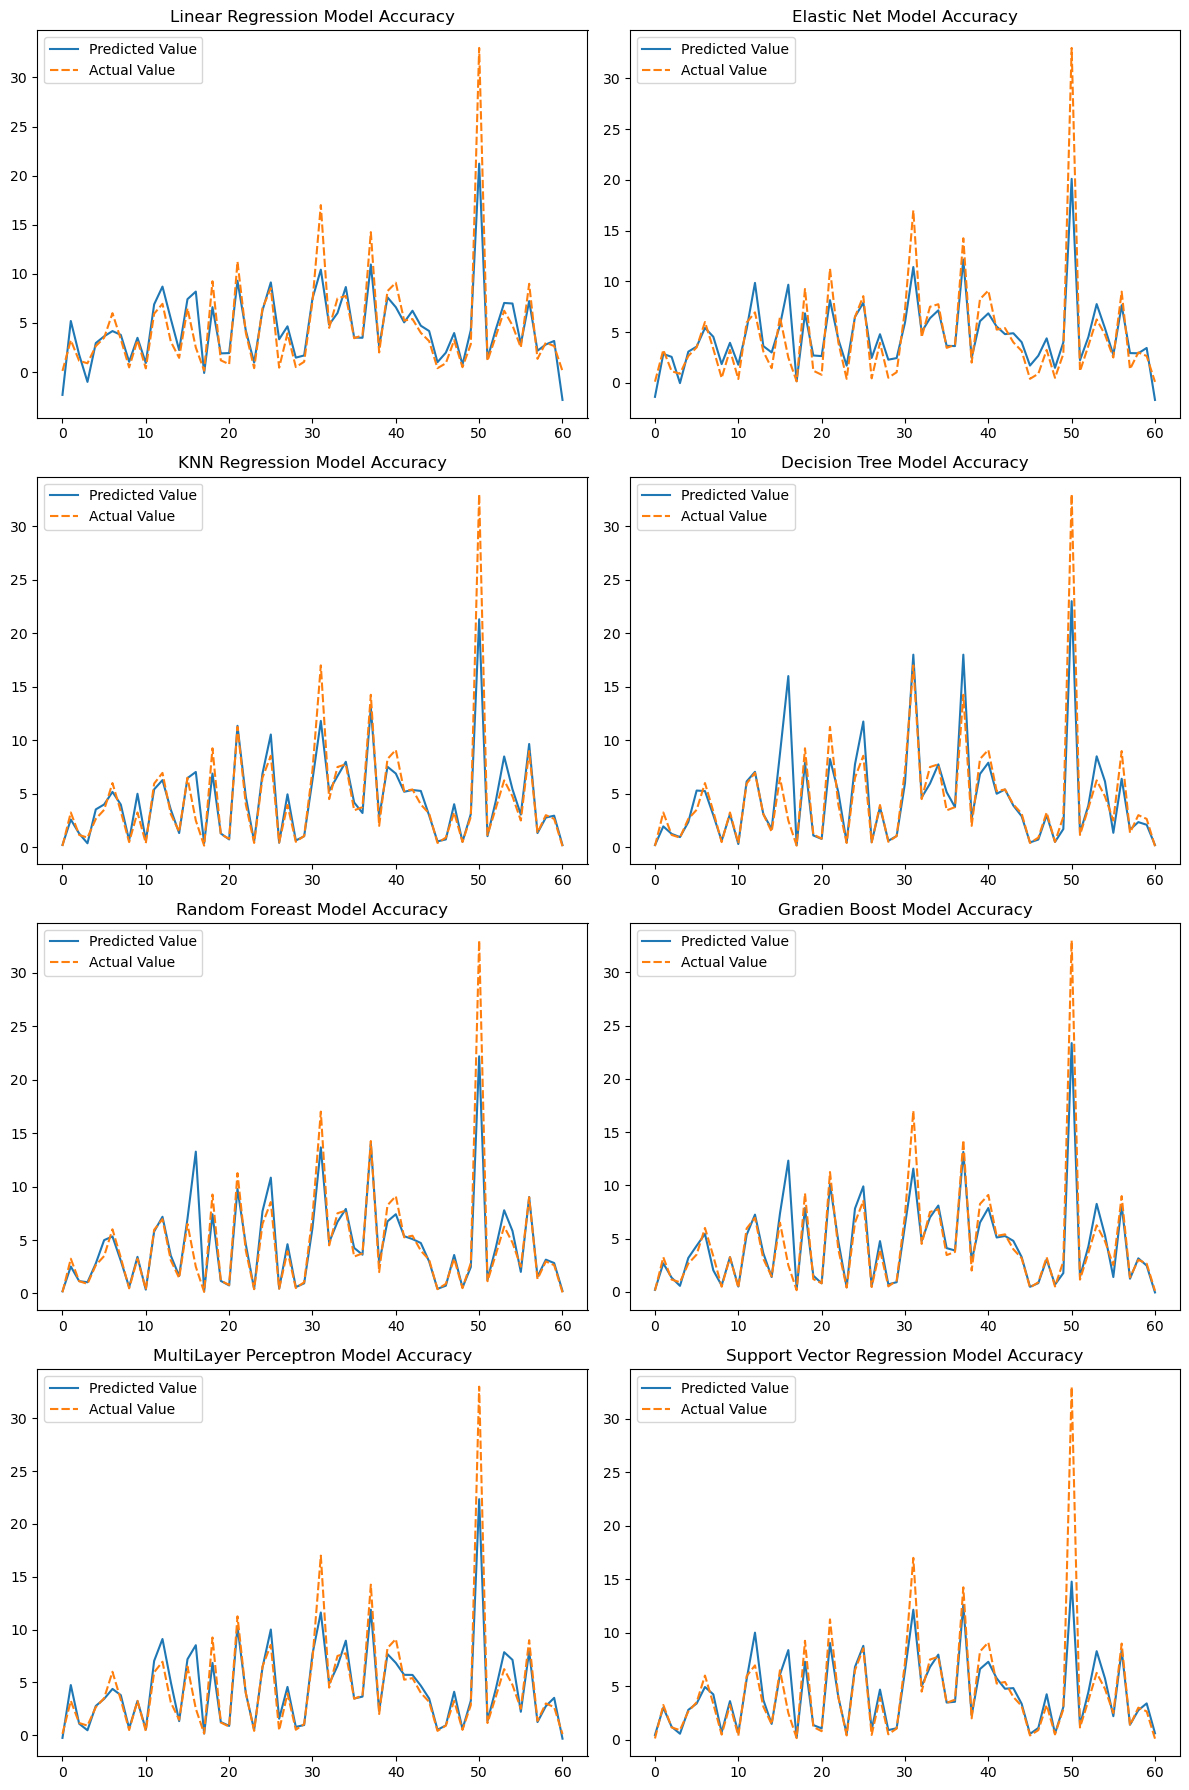

In [23]:
Performance_Report = pd.DataFrame()
fig,j,Trained_Model = plt.figure(figsize=(12,18)),1,[]
for key, mod in Regressors.items():
    ax = fig.add_subplot(4,2,j)
    Trained_Model.append(Model(key,mod))
    j+=1
    plt.tight_layout()
plt.savefig('../Figure/Output.png')

<br></br>

In [21]:
Performance_Report.index = [i for i in range(len(Performance_Report))]
Performance_Report

,Model,R2 Score,Root Mean Square Error,Mean Absolute Error,Mean Absolute Percentage Error
0,Linear Regression,0.80,2.27,1.36,1.38
1,Elastic Net,0.78,2.38,1.46,1.25
2,KNN Regression,0.86,1.91,0.89,0.25
3,Decision Tree,0.72,2.67,1.12,0.28
4,Random Foreast,0.82,2.17,0.90,0.24
5,Gradien Boost,0.86,1.90,0.89,0.25
6,MultiLayer Perceptron,0.87,1.86,0.91,0.26
7,Support Vector Regression,0.72,2.66,1.02,0.36


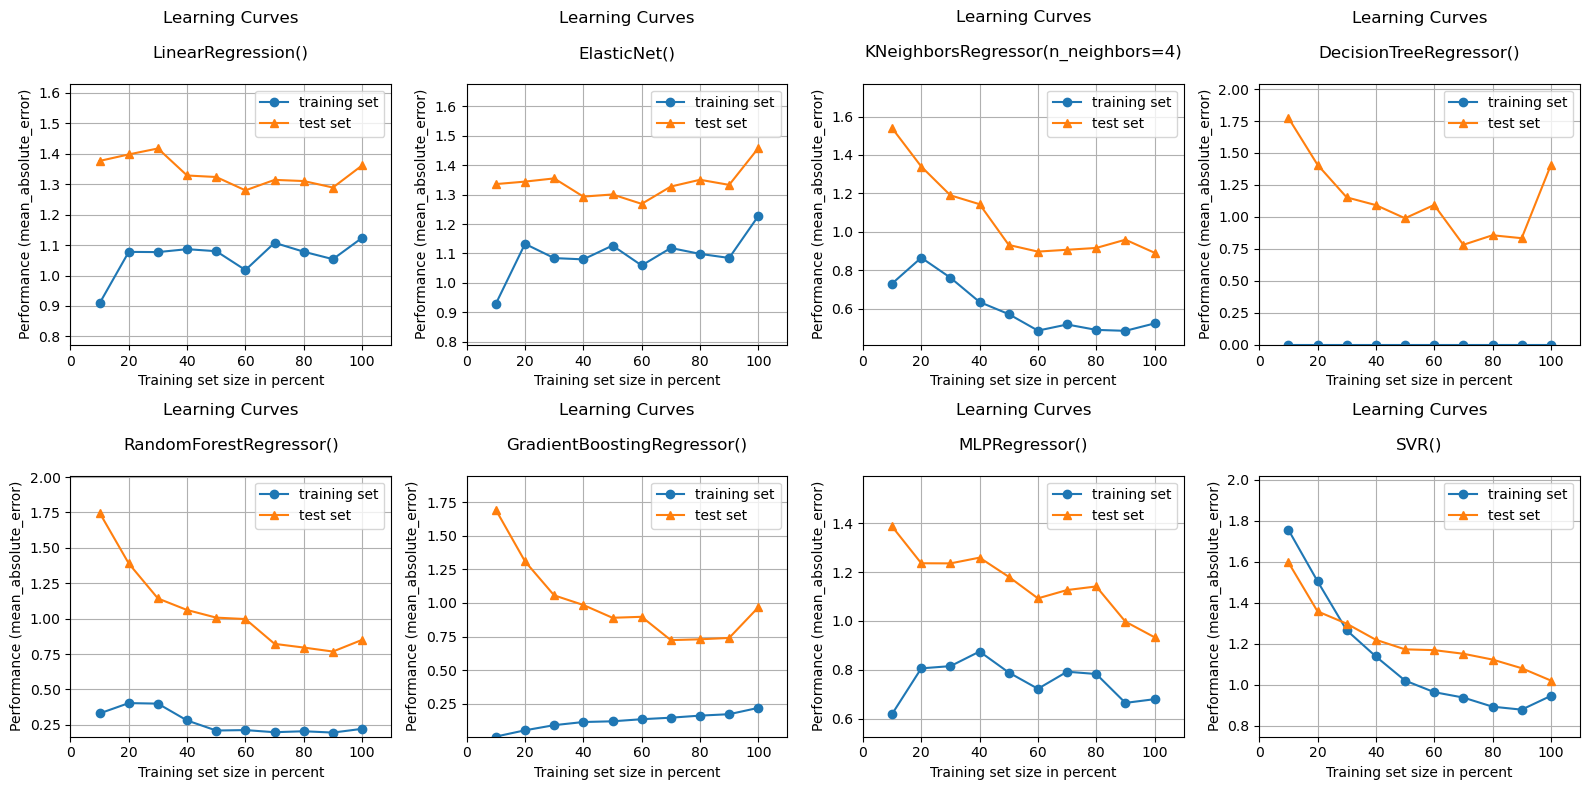

In [22]:
fig = plt.figure(figsize=(16,8))
for i in range(len(Trained_Model)):
    ax = fig.add_subplot(2,4,i+1)
    plot_learning_curves(X_train,Y_train, X_test, Y_test, Trained_Model[i], scoring='mean_absolute_error')
    plt.grid()
    plt.tight_layout()
plt.savefig('../Figure/LearningCurve.png')

In [23]:

def annote(ax,h=0):
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2,
                p.get_height()+h,
                f'{p.get_height()}',
                ha='center',
                va='bottom' 
               )
    return None

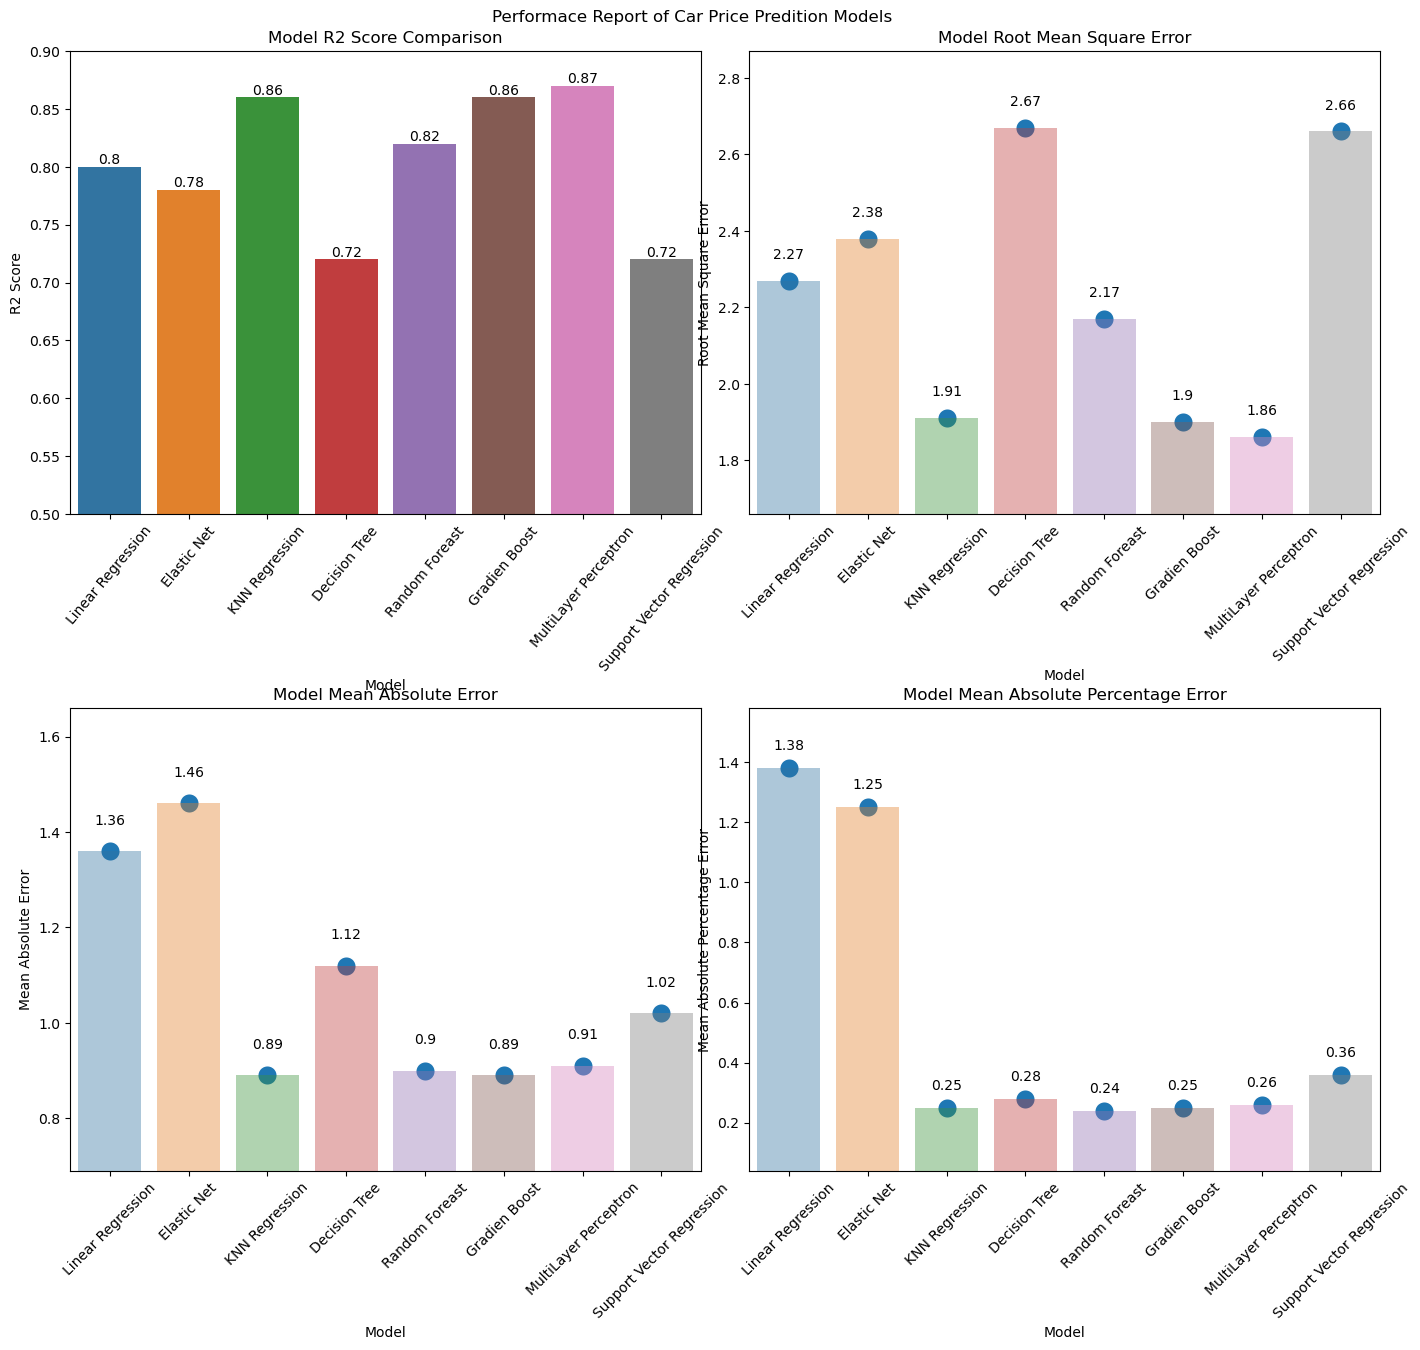

In [24]:
fig6 = plt.figure(figsize=(14,12))
fig6.suptitle('Performace Report of Car Price Predition Models ')
ax = fig6.add_subplot(2,2,1)
sns.barplot(Performance_Report,x='Model',y='R2 Score',label='R2 Score').set_title('Model R2 Score Comparison')
ax = plt.gca()
annote(ax)
plt.xticks(rotation=50)
plt.ylim(0.5,0.9)
plt.tight_layout()
for i in range(2,5):
    ax = fig6.add_subplot(2,2,i)
    column = Performance_Report.columns[i]
    sns.scatterplot(data=Performance_Report,x='Model',y=column,s=200)
    bar = sns.barplot(data=Performance_Report,x='Model',y=column,alpha=0.4,errwidth=0).set_title('Model '+column)
    ax = plt.gca()
    annote(ax,0.05)
    Min = min(Performance_Report[column]) - 0.2
    Max = max(Performance_Report[column]) + 0.2
    plt.ylim(Min,Max)
    plt.xticks(rotation=45)
plt.savefig('../Figure/Performace.png')

In [3]:
Performance_Report

NameError: name 'Performance_Report' is not defined

### Hyperparameter Tunning 

In [25]:
Best_Score,Best_Parameter=0,{'Linear Regression' : None}
for i , mod in Regressors.items():
    if(i=='Linear Regression'): continue
    grid = GridSearchCV(estimator=mod,param_grid=Parameters[i],cv=5);
    grid.fit(X_train,Y_train)
    Best_Parameter[i] = grid.best_params_
    print('For '+i+' Model ')
    print('Best Score is ',grid.best_score_)
    print('Parameter at best score is ',grid.best_params_,end='\n\n')

For Elastic Net Model 
Best Score is  0.8413370335337461
Parameter at best score is  {'alpha': 0.1, 'l1_ratio': 0}

For KNN Regression Model 
Best Score is  0.9443746635745358
Parameter at best score is  {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}

For Decision Tree Model 
Best Score is  0.899410035425468
Parameter at best score is  {'criterion': 'squared_error', 'splitter': 'best'}

For Random Foreast Model 
Best Score is  0.8727115418284924
Parameter at best score is  {'bootstrap': False, 'criterion': 'squared_error', 'max_features': None}

For Gradien Boost Model 
Best Score is  0.8855985126174296
Parameter at best score is  {'criterion': 'friedman_mse', 'loss': 'huber', 'max_features': 'sqrt'}

For MultiLayer Perceptron Model 
Best Score is  0.8141712123606165
Parameter at best score is  {'alpha': 0.01, 'hidden_layer_sizes': (10, 10, 5)}

For Support Vector Regression Model 
Best Score is  0.8805730701694816
Parameter at best score is  {'C': 10, 'gamma': 

---------------------------------------------------------------------------
R2 Score, for Linear Regression Model is : 0.8

Root Mean Square Error, for Linear Regression Model is : 2.27

Mean Absolute Error, for Linear Regression Model is : 1.36

Mean Absolute Percentage Error, for Linear Regression Model is : 1.38




---------------------------------------------------------------------------
R2 Score, for Elastic Net Model is : 0.8

Root Mean Square Error, for Elastic Net Model is : 2.26

Mean Absolute Error, for Elastic Net Model is : 1.37

Mean Absolute Percentage Error, for Elastic Net Model is : 1.43




---------------------------------------------------------------------------
R2 Score, for KNN Regression Model is : 0.83

Root Mean Square Error, for KNN Regression Model is : 2.09

Mean Absolute Error, for KNN Regression Model is : 0.92

Mean Absolute Percentage Error, for KNN Regression Model is : 0.21




------------------------------------------------------------------------

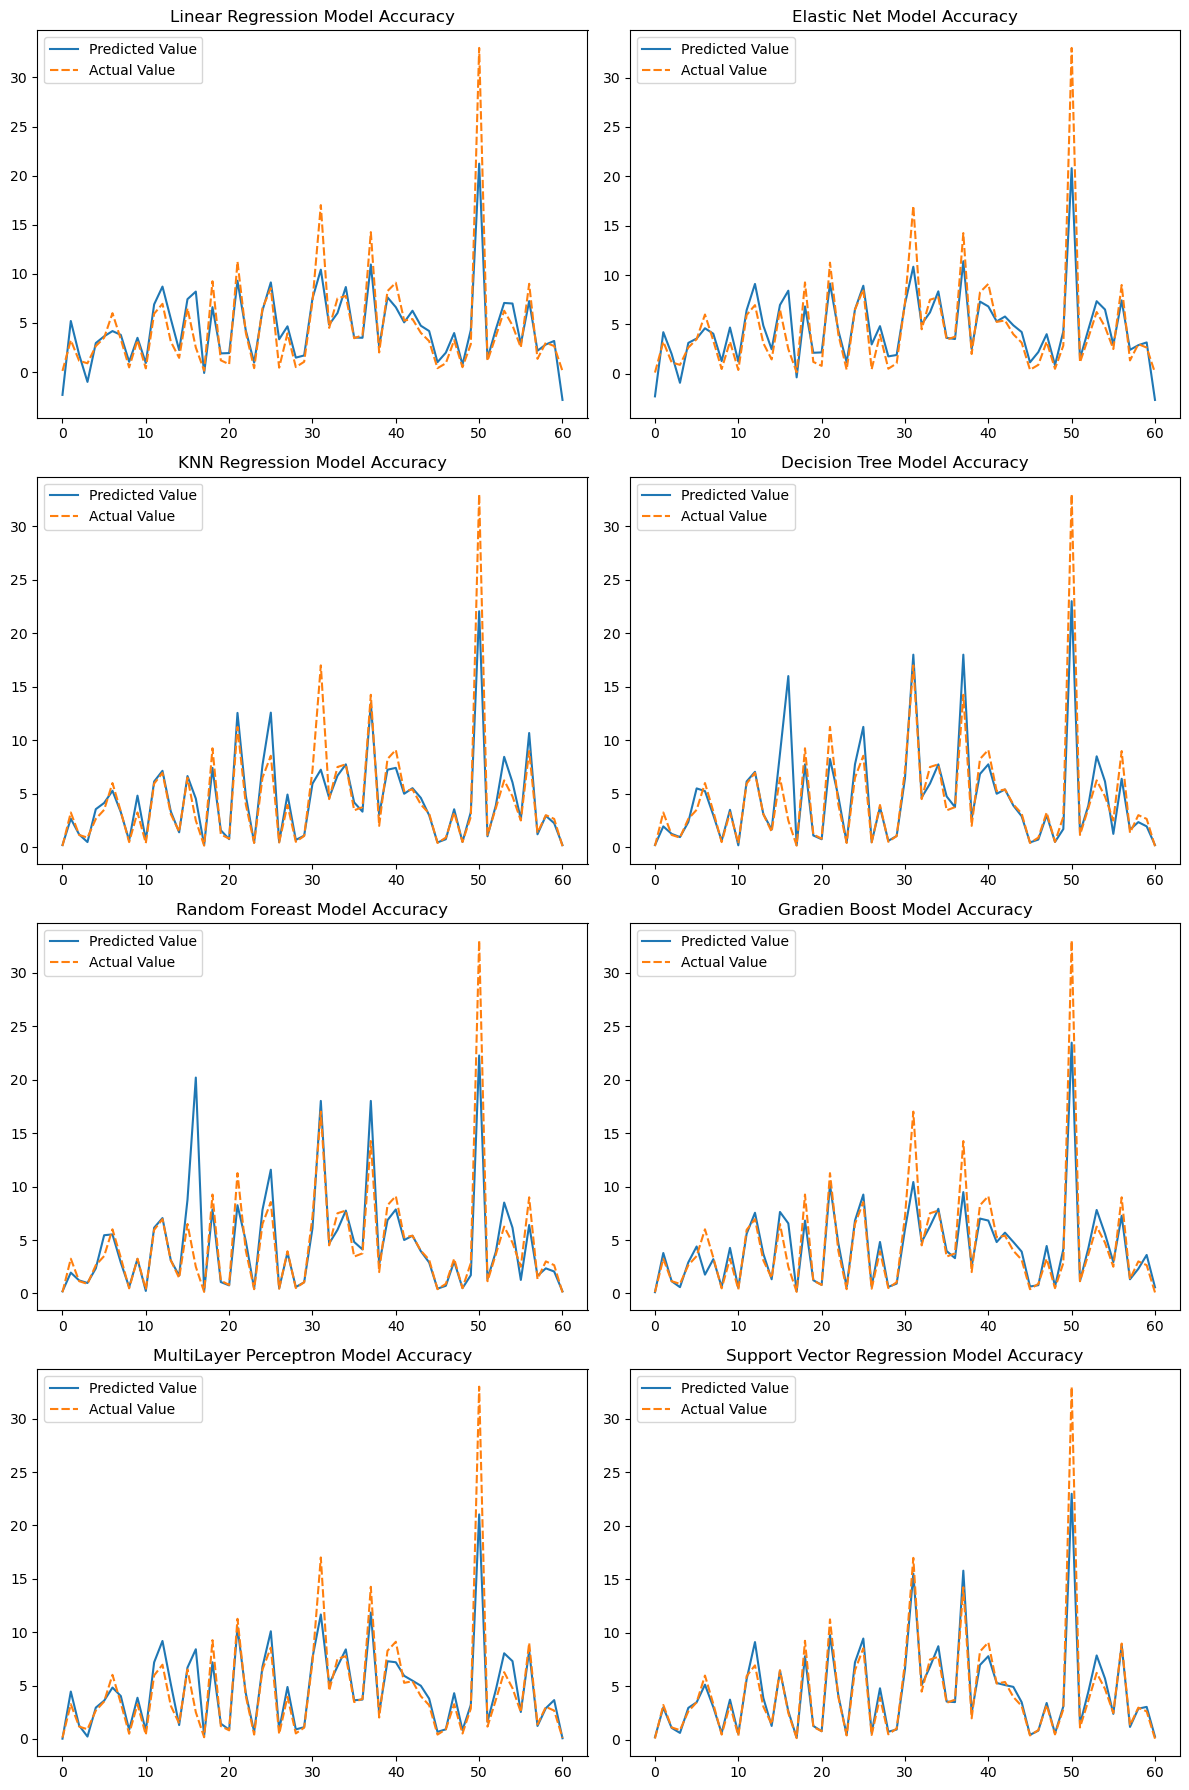

In [26]:
Performance_Report2 = pd.DataFrame()
fig,j,Trained_Model = plt.figure(figsize=(12,18)),1,[]
for key, mod in Regressors.items():
    ax = fig.add_subplot(4,2,j)
    Trained_Model.append(Model(key,mod,Best_Parameter[key],i))
    j+=1
    plt.tight_layout()
plt.savefig('../Figure/Output1.png')

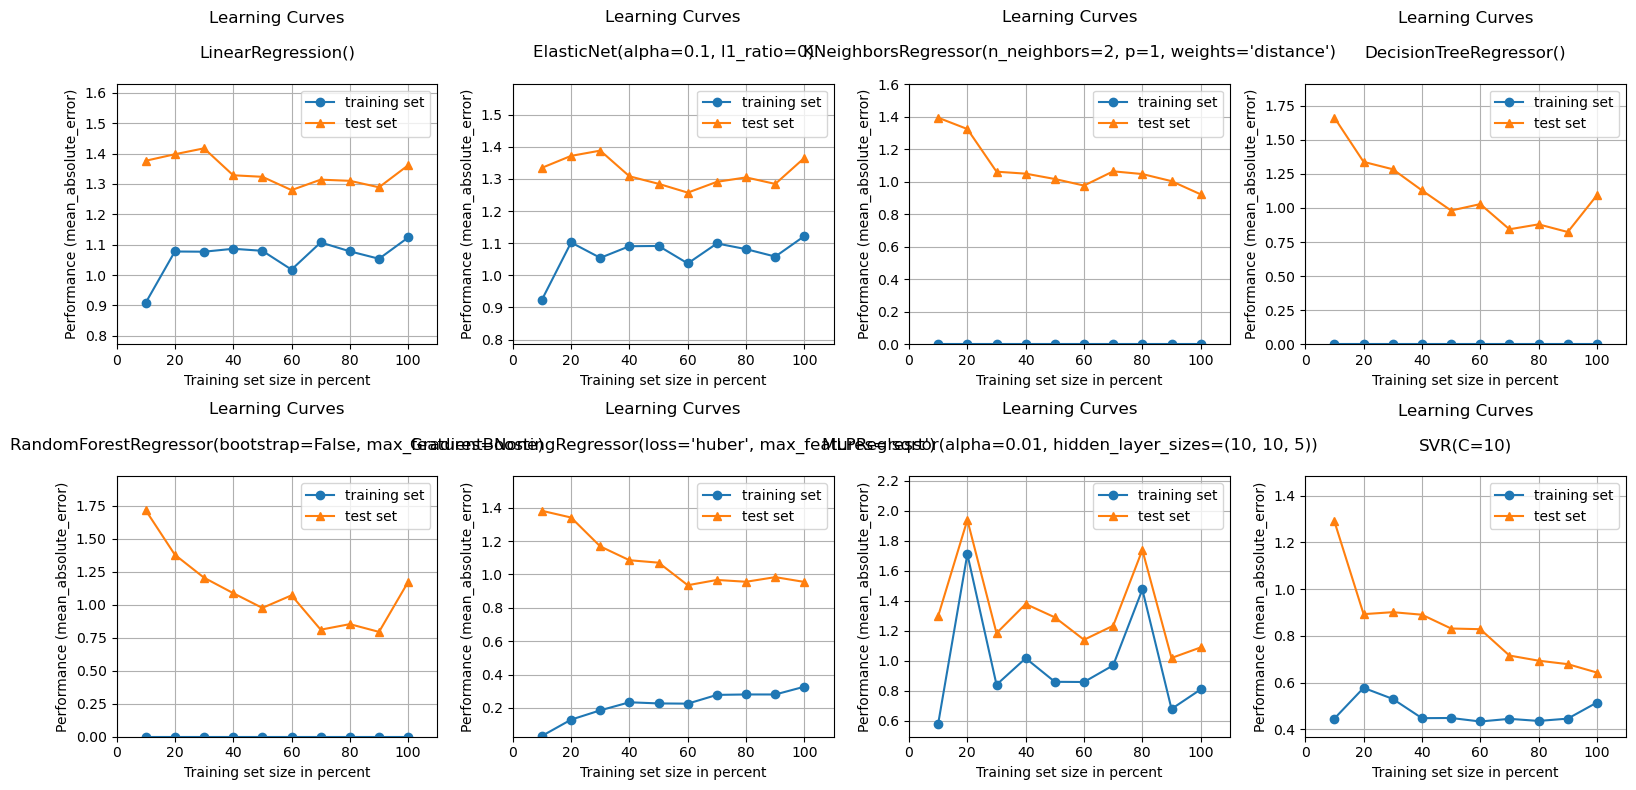

In [27]:
fig = plt.figure(figsize=(16,8))
for i in range(len(Trained_Model)):
    ax = fig.add_subplot(2,4,i+1)
    plot_learning_curves(X_train,Y_train, X_test, Y_test, Trained_Model[i], scoring='mean_absolute_error')
    plt.grid()
    plt.tight_layout()
plt.savefig('../Figure/LearningCurve1.png')

In [28]:
Performance_Report2.index = [i for i in range(len(Performance_Report2))]
Performance_Report2

,Model,R2 Score,Root Mean Square Error,Mean Absolute Error,Mean Absolute Percentage Error
0,Linear Regression,0.80,2.27,1.36,1.38
1,Elastic Net,0.80,2.26,1.37,1.43
2,KNN Regression,0.83,2.09,0.92,0.21
3,Decision Tree,0.77,2.42,1.07,0.28
4,Random Foreast,0.68,2.88,1.16,0.31
5,Gradien Boost,0.85,1.94,1.03,0.31
6,MultiLayer Perceptron,0.84,2.06,1.02,0.32
7,Support Vector Regression,0.92,1.46,0.64,0.18


In [29]:
def annote(ax,h=0):
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2,
                p.get_height()+h,
                f'{p.get_height()}',
                ha='center',
                va='bottom' 
               )
    return None

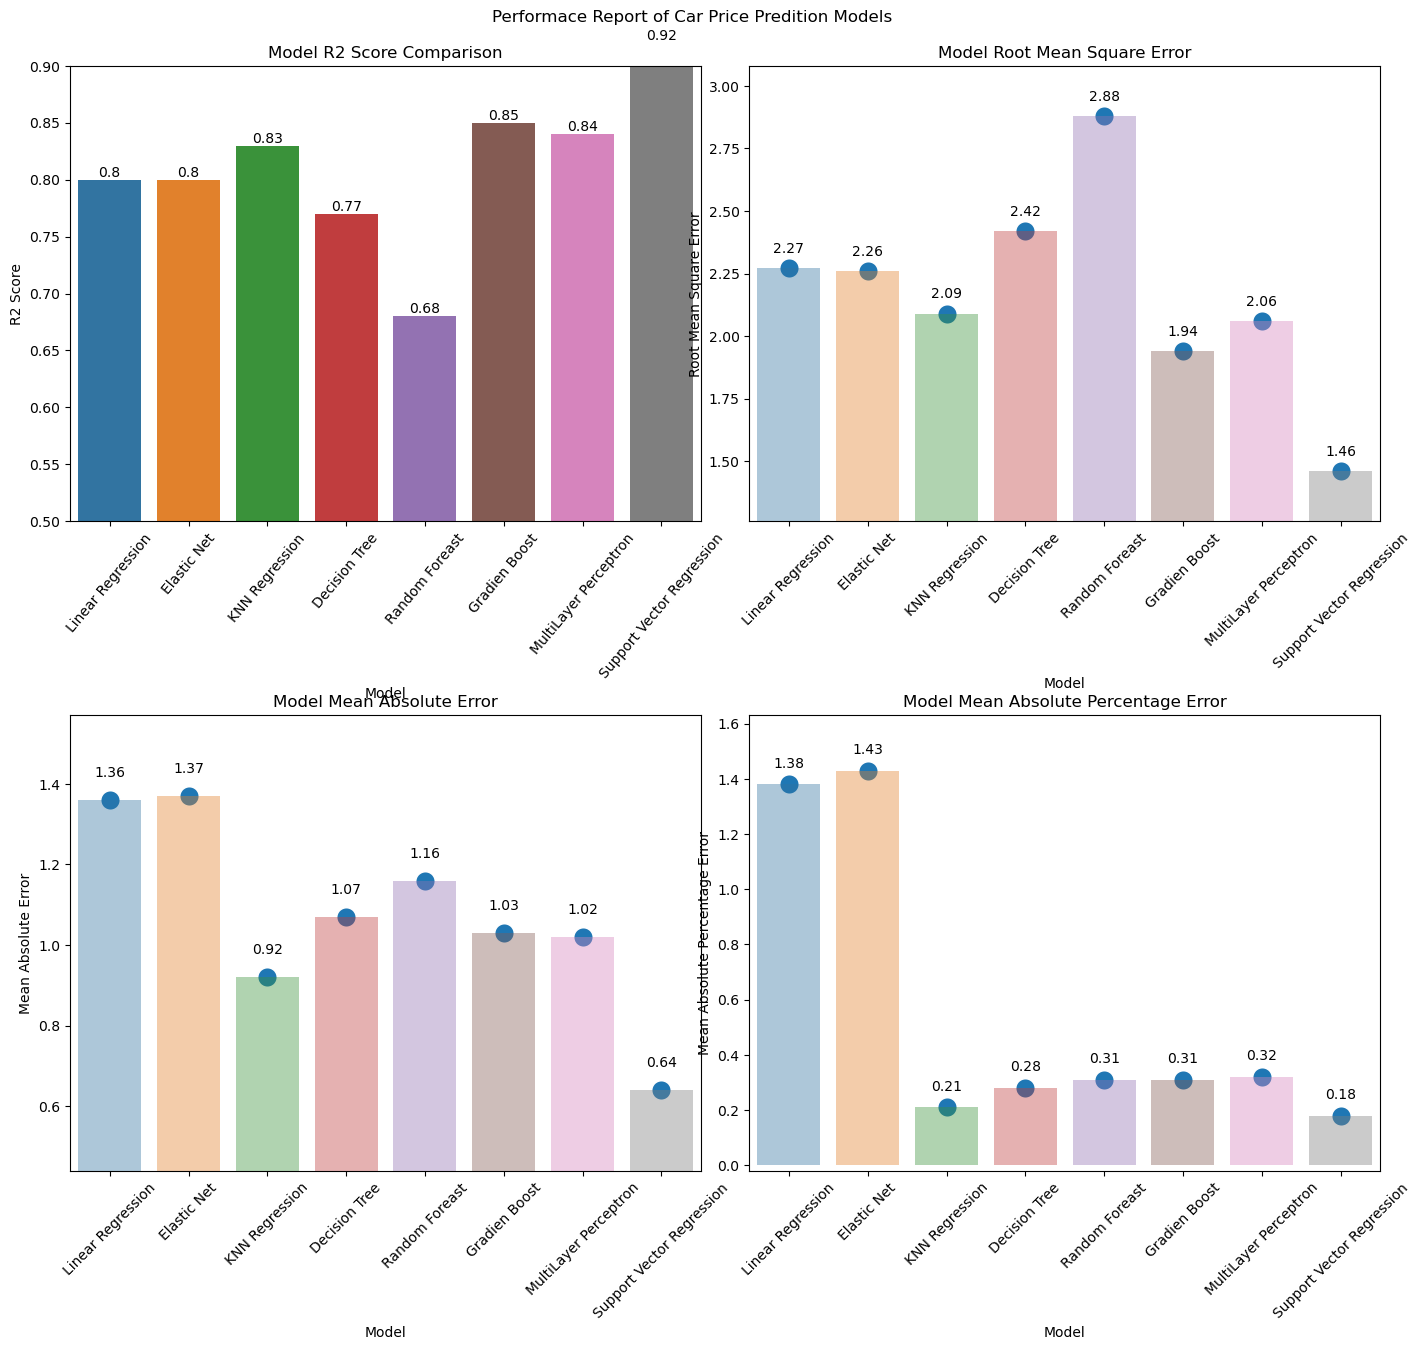

In [30]:
fig6 = plt.figure(figsize=(14,12))
fig6.suptitle('Performace Report of Car Price Predition Models ')
ax = fig6.add_subplot(2,2,1)
sns.barplot(Performance_Report2,x='Model',y='R2 Score',label='R2 Score').set_title('Model R2 Score Comparison')
ax = plt.gca()
annote(ax)
plt.xticks(rotation=50)
plt.ylim(0.5,0.9)
plt.tight_layout()
for i in range(2,5):
    ax = fig6.add_subplot(2,2,i)
    column = Performance_Report2.columns[i]
    sns.scatterplot(data=Performance_Report2,x='Model',y=column,s=200)
    bar = sns.barplot(data=Performance_Report2,x='Model',y=column,alpha=0.4,errwidth=0).set_title('Model '+column)
    ax = plt.gca()
    annote(ax,0.05)
    Min = min(Performance_Report2[column]) - 0.2
    Max = max(Performance_Report2[column]) + 0.2
    plt.ylim(Min,Max)
    plt.xticks(rotation=45)
plt.savefig('../Figure/Performace1.png')